In [30]:
import pandas as pd
import numpy as np
import imblearn
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [13]:
#balancing the dataset here:
df = pd.read_csv('diabetes.csv')
undersample = NearMiss(version=1)
X = df.loc[:, df.columns != 'Diabetes_binary']
y = df.loc[:, df.columns == 'Diabetes_binary']
X, y = undersample.fit_resample(X, y)

#splitting the balanced dataset into train and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#putting the balanced datasets into individual dataframes for the train and test splits
df_undersampled_train = pd.DataFrame(X_train_scaled, columns = X.columns)
df_undersampled_train['Diabetes_binary'] = y_train
df_undersampled_train.head()

df_undersampled_test = pd.DataFrame(X_test_scaled, columns = X.columns)
df_undersampled_test['Diabetes_binary'] = y_test
df_undersampled_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,-1.212894,0.876922,0.074482,-1.061978,1.158253,-0.225623,-0.384172,0.514775,-1.494245,0.418265,...,-0.237966,1.255723,-0.332699,-0.446002,-0.485309,-1.036097,0.367769,-1.162526,-0.619867,NaN
1,-1.212894,-1.140353,0.074482,0.377975,1.158253,-0.225623,-0.384172,0.514775,0.669234,0.418265,...,-0.237966,-0.639948,-0.332699,-0.446002,-0.485309,0.965161,-2.279439,0.864409,0.843982,NaN
2,0.824475,0.876922,0.074482,1.017954,-0.863369,-0.225623,-0.384172,0.514775,0.669234,0.418265,...,-0.237966,0.307887,-0.332699,-0.220989,-0.485309,0.965161,-0.073432,0.864409,0.843982,NaN
3,-1.212894,0.876922,0.074482,0.377975,-0.863369,-0.225623,-0.384172,0.514775,0.669234,0.418265,...,-0.237966,-0.639948,-0.332699,-0.446002,-0.485309,-1.036097,-0.514634,0.864409,0.356032,NaN
4,0.824475,-1.140353,0.074482,2.777896,-0.863369,-0.225623,-0.384172,0.514775,0.669234,0.418265,...,-0.237966,1.255723,4.162593,0.679064,2.060543,0.965161,-1.397036,0.864409,-1.595766,0.0


# Lasso Feature Selection

* This was the best feature selection of the two methods that I tried
    * Lasso performed better in ever model compared to correlation
   

In [14]:
X_lasso_selected_train = df_undersampled_train.loc[:, ['Sex', 'HighBP', 'DiffWalk', 'MentHlth', 'HighChol', 'AnyHealthcare', 'Smoker',
                       'Fruits','Income']]
X_lasso_selected_test = df_undersampled_test.loc[:, ['Sex', 'HighBP', 'DiffWalk', 'MentHlth', 'HighChol', 'AnyHealthcare', 'Smoker',
                       'Fruits','Income']]

# Wrapper Method Feature Selection

* The features used are from the best estimator and direction combonation that yielded the best results

In [15]:
sfs_selected_train = df_undersampled_train.iloc[:, [3, 5, 6, 7, 9, 13, 14, 15, 20]]
sfs_selected_test = df_undersampled_test.iloc[:, [3,  5,  6, 7, 9, 13, 14, 15, 20]]

# Step 1
## Best Model Using The Lasso Method

In [32]:
rf = RandomForestClassifier(criterion = 'entropy',max_features = 'sqrt', max_depth = 15, min_samples_split = 2,min_samples_leaf=17, random_state=42)
rf.fit(X_lasso_selected_train, y_train.values.ravel())
rf_train_pred = rf.predict(X_lasso_selected_train)
rf_train_score = accuracy_score(y_train, rf_train_pred)
rf_test_pred = rf.predict(X_lasso_selected_test)
rf_test_score = accuracy_score(y_test, rf_test_pred)

print(f'Train Accuracy: {rf_train_score}')
print(f'Classification Report for Train: \n{classification_report(y_train.values.ravel(), rf_train_pred)}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_train.values.ravel(), rf_train_pred)}\n')

print(f'Test Accuracy: {rf_test_score}')
print(f'Classification Report for Test: \n{classification_report(y_test.values.ravel(), rf_test_pred)}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test.values.ravel(), rf_test_pred)}\n')

Train Accuracy: 0.8152332066930725
Classification Report for Train: 
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83     24745
         1.0       0.88      0.73      0.80     24739

    accuracy                           0.82     49484
   macro avg       0.83      0.82      0.81     49484
weighted avg       0.83      0.82      0.81     49484


Confusion Matrix:
[[22319  2426]
 [ 6717 18022]]

Test Accuracy: 0.8154941531497548
Classification Report for Test: 
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83     10601
         1.0       0.88      0.73      0.80     10607

    accuracy                           0.82     21208
   macro avg       0.82      0.82      0.81     21208
weighted avg       0.82      0.82      0.81     21208


Confusion Matrix:
[[9540 1061]
 [2852 7755]]



## Confusion Matrix For Test Set On Random Forest Tree With Lasso Method

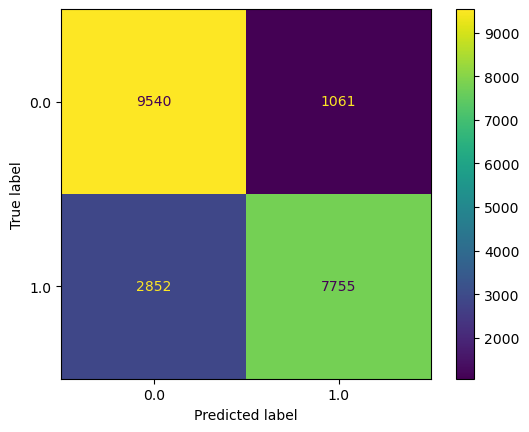

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.values.ravel(), rf_test_pred), display_labels = rf.classes_)
disp.plot()
plt.show()

## Best Model Using Wrapper Feature Selection

In [36]:
rf = RandomForestClassifier(criterion = 'entropy',max_features = 'sqrt', max_depth = 15, min_samples_split = 2,min_samples_leaf=17, random_state=42)
rf.fit(sfs_selected_train, y_train.values.ravel())
rf_train_pred = rf.predict(sfs_selected_train)
rf_train_score = accuracy_score(y_train, rf_train_pred)
rf_test_pred = rf.predict(sfs_selected_test)
rf_test_score = accuracy_score(y_test, rf_test_pred)

print(f'Train Accuracy: {rf_train_score}')
print(f'Classification Report for Train: \n{classification_report(y_train.values.ravel(), rf_train_pred)}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_train.values.ravel(), rf_train_pred)}\n')

print(f'Test Accuracy: {rf_test_score}')
print(f'Classification Report for Test: \n{classification_report(y_test.values.ravel(), rf_test_pred)}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test.values.ravel(), rf_test_pred)}\n')

Train Accuracy: 0.8788699377576591
Classification Report for Train: 
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89     24745
         1.0       0.93      0.82      0.87     24739

    accuracy                           0.88     49484
   macro avg       0.88      0.88      0.88     49484
weighted avg       0.88      0.88      0.88     49484


Confusion Matrix:
[[23093  1652]
 [ 4342 20397]]

Test Accuracy: 0.8728310071671067
Classification Report for Test: 
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88     10601
         1.0       0.92      0.82      0.87     10607

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208


Confusion Matrix:
[[9823  778]
 [1919 8688]]



## Confusion Matrix For Test Set On Random Forest Tree With Wrapper Method

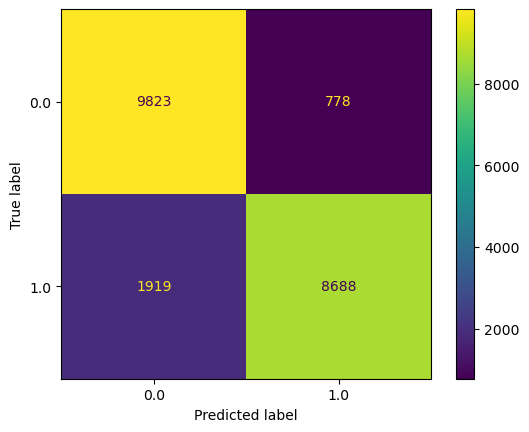

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.values.ravel(), rf_test_pred), display_labels = rf.classes_)
disp.plot()
plt.show()

# Step 5 Models Using Wrapper Feature Selection
* Using the wrapper method selection as in all models it had the best performance compared to the Lasso features

## XGBoost Model

In [40]:
xgb = XGBClassifier(colsample_bytree = 0.5, learning_rate = 0.3, max_depth=6, min_child_weight=1,
                    objective='binary:hinge', seed=1, subsamples=0.5)
xgb.fit(sfs_selected_train, y_train.values.ravel())

xgb_train_pred = xgb.predict(sfs_selected_train)
xgb_train_score = accuracy_score(y_train.values.ravel(), xgb_train_pred)

xgb_test_pred = xgb.predict(sfs_selected_test)
xgb_test_score = accuracy_score(y_test.values.ravel(), xgb_test_pred)

print(f'Train Accuracy: {xgb_train_score}')
print(f'Classification Report for Train: \n{classification_report(y_train.values.ravel(), xgb_train_pred)}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_train.values.ravel(), xgb_train_pred)}\n')

print(f'Test Accuracy: {xgb_test_score}')
print(f'Classification Report for Test: \n{classification_report(y_test.values.ravel(), xgb_test_pred)}\n')
print(f'Confusion Matrix:\n{confusion_matrix(y_test.values.ravel(), xgb_test_pred)}\n')

C:\Users\Felipe\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [01:09:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "subsamples" } are not used.

  warnings.warn(smsg, UserWarning)


Train Accuracy: 0.8809514186403686
Classification Report for Train: 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89     24745
         1.0       0.94      0.82      0.87     24739

    accuracy                           0.88     49484
   macro avg       0.89      0.88      0.88     49484
weighted avg       0.89      0.88      0.88     49484


Confusion Matrix:
[[23412  1333]
 [ 4558 20181]]

Test Accuracy: 0.8741512636740852
Classification Report for Test: 
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88     10601
         1.0       0.93      0.81      0.87     10607

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208


Confusion Matrix:
[[9953  648]
 [2021 8586]]



## Confusion Matrix For Test Set On XGBoost Model With Wrapper Method

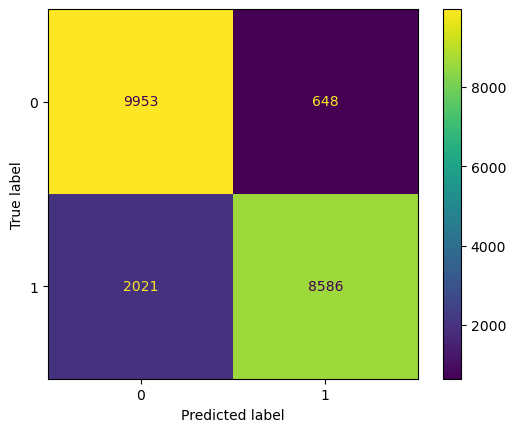

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.values.ravel(), xgb_test_pred), display_labels = xgb.classes_)
disp.plot()
plt.show()

## Extreme Machine Learning Model

* This was based off of a resource found in kaggle that was highly acclaimed.
    * The resource is noted in the report

In [19]:
input_length = sfs_selected_train.shape[1]
hidden_units = 1000

win = np.random.normal(size = [input_length, hidden_units])

def input_to_hidden(x):
    a = np.dot(x, win)
    a = np.maximum(a, 0, a)
    return a

x_h_v = input_to_hidden(sfs_selected_train)
x_h_t = np.transpose(x_h_v)
w_out = np.dot(np.linalg.inv(np.dot(x_h_t, x_h_v)), np.dot(x_h_t, y_train))

def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, w_out)
    return y

extreme_pred = predict(sfs_selected_test)
num_correct = 0
total = extreme_pred.shape[0]
for i in range(total):
    predicted = np.argmax(extreme_pred[i])
    test = np.argmax(y_test.values.ravel()[i])
    num_correct = num_correct + (1 if predicted == test else 0)
    
print('Accuracy of test set: {:f}'.format(num_correct/total))

extreme_pred = predict(sfs_selected_train)
num_correct = 0
total = extreme_pred.shape[0]
for i in range(total):
    predicted = np.argmax(extreme_pred[i])
    train = np.argmax(y_train.values.ravel()[i])
    num_correct = num_correct + (1 if predicted == train else 0)
    
print('Accuracy of train set: {:f}'.format(num_correct/total))

Accuracy of test set: 1.000000
Accuracy of train set: 1.000000


## Deep Learning Model

* Contains 2 hidden layers
* There are 4 layers in total
    * One input layer
    * Two hidden layers
        * The first Layer having 40 nodes and the second having 10 nodes
    * One output layer

In [20]:
nn = Sequential()
nn.add(Dense(20, input_shape=(9,), activation='relu'))
nn.add(Dense(40, activation = 'relu'))
nn.add(Dense(10, activation = 'relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss = 'binary_crossentropy', optimizer='adam', metrics='accuracy')
nn.fit(sfs_selected_train, y_train.values.ravel(), epochs=50, batch_size=10)

_, train_accuracy = nn.evaluate(sfs_selected_train, y_train)
_2, test_accuracy = nn.evaluate(sfs_selected_test, y_test)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/50
4949/4949 [==============================] - 4s 675us/step - loss: 0.3232 - accuracy: 0.8634
Epoch 2/50
4949/4949 [==============================] - 3s 679us/step - loss: 0.2931 - accuracy: 0.8736
Epoch 3/50
4949/4949 [==============================] - 3s 679us/step - loss: 0.2892 - accuracy: 0.8760
Epoch 4/50
4949/4949 [==============================] - 3s 676us/step - loss: 0.2877 - accuracy: 0.8761
Epoch 5/50
4949/4949 [==============================] - 3s 668us/step - loss: 0.2863 - accuracy: 0.8763
Epoch 6/50
4949/4949 [==============================] - 3s 685us/step - loss: 0.2860 - accuracy: 0.8762
Epoch 7/50
4949/4949 [==============================] - 3s 679us/step - loss: 0.2850 - accuracy: 0.8769
Epoch 8/50
4949/4949 [==============================] - 3s 681us/step - loss: 0.2847 - accuracy: 0.8777
Epoch 9/50
4949/4949 [==============================] - 3s 666us/step - loss: 0.2847 - accuracy: 0.8771
Epoch 10/50
4949/4949 [==============================] - 3s 672u

## Confusion Matrix Of Test Data Using The Neural Network On The Wrapper Selections

663/663 [==============================] - 0s 517us/step


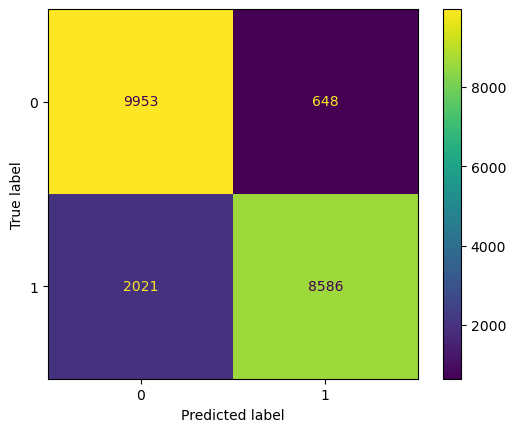

In [55]:
nn_test_pred = nn.predict(sfs_selected_test)
nn_test_pred = np.round(nn_test_pred)

cm = confusion_matrix(y_test, nn_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test.values.ravel(), xgb_test_pred), display_labels = xgb.classes_)
disp.plot()
plt.show()

## Ensemble Model

In [21]:
model_1 = RandomForestClassifier(criterion = 'gini', max_depth = 10, min_samples_split = 18, random_state=42)
model_2 = SVC(C = 5, degree = 3, gamma = 'scale', kernel = 'rbf')
model_3 = LogisticRegression(C = 1, penalty = 'l1', random_state=42, solver = 'saga')

ensemble_model = VotingClassifier(estimators = [('rf', model_1), ('svm', model_2), ('lg', model_3)],
                                 voting = 'hard',
                                 n_jobs = -1,
                                 verbose = True)
ensemble_model.fit(sfs_selected_train, y_train.values.ravel())
ensemble_pred_train = ensemble_model.predict(sfs_selected_train)
ensemble_pred_test = ensemble_model.predict(sfs_selected_test)

ensemble_train_score = accuracy_score(y_train.values.ravel(), ensemble_pred_train)
ensemble_test_score = accuracy_score(y_test.values.ravel(), ensemble_pred_test)

print(f'Train Accuracy: {ensemble_train_score}')
print(f'Classification Report for Train: \n{classification_report(y_train.values.ravel(), ensemble_pred_train)}\n')

print(f'Test Accuracy: {ensemble_test_score}')
print(f'Classification Report for Test: \n{classification_report(y_test.values.ravel(), ensemble_pred_test)}\n')

Train Accuracy: 0.878162638428583
Classification Report for Train: 
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     24745
         1.0       0.93      0.81      0.87     24739

    accuracy                           0.88     49484
   macro avg       0.88      0.88      0.88     49484
weighted avg       0.88      0.88      0.88     49484


Test Accuracy: 0.8718879668049793
Classification Report for Test: 
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     10601
         1.0       0.93      0.81      0.86     10607

    accuracy                           0.87     21208
   macro avg       0.88      0.87      0.87     21208
weighted avg       0.88      0.87      0.87     21208




## Confusion Matrix Of Test Data Using The Ensemble Model With The Wrapper Selections

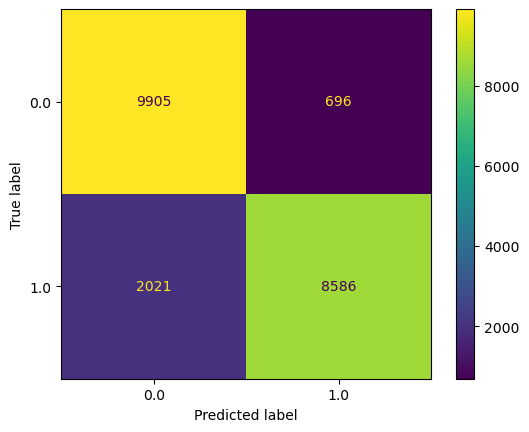

In [43]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test.values.ravel(), ensemble_pred_test), display_labels = ensemble_model.classes_)
disp.plot()
plt.show()

# Results

* Amongst all the models the model with the highest performance is the Extreme Learning Model
    * To be truthful I am unsure as to whether this model can truly be trusted
    * However,  it is impossible to take note of the accuracy that it is capable of
    * I have gone through and tested the model with random samples on my own and it has yielded the same results


* Here is a ranking of the models based off of performance:
    1) Extreme Learning Model
        * Training Accuracy: 1
        * Testing Accuracy: 1
        
    2) 2 Hidden Layer Neural Network
        * Training Accuracy: 0.880
        * Testing Accuracy: 0.875
        
    3) XGBoost Model
        * Training Accuracy: 0.880
        * Testing Accuracy: 0.874
        
    4) Random Forest Tree with Wrapper selection method
        * Training Accuracy: 0.878
        * Testing Accuracy: 0.872
    
    5) Ensemble Model
        * Training Accuracy: 0.878
        * Testing Accuracy: 0.871
        
    6) Random Forest Tree with Lasso selection method 
        * Training Accuracy: 0.815
        * Testing Accuracy: 0.815
        
    * Important to note that some of these models are only slightly better than their counterparts. For instance, Random Forest is only slightly better than the Ensemble Model. I'm sure with certain data samples the places could be switched but with the current testing this is where the results lie.